Accuracy: 0.845


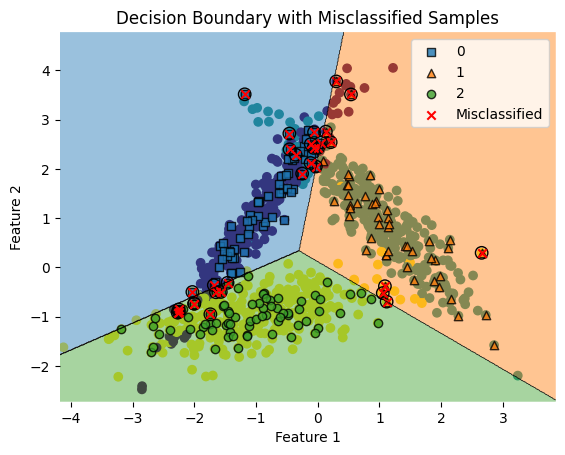

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# ایجاد داده‌های تصادفی با 3 کلاس
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42, n_redundant=0, n_repeated=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

# تقسیم داده به دو بخش آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد LogisticRegression برای چند کلاس
clf = LogisticRegression(multi_class='ovr', random_state=42)

# آموزش مدل
clf.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های تست
y_pred = clf.predict(X_test)

# ارزیابی دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# نمایش مرز تصمیم گیری و نمونه‌های اشتباه طبقه‌بندی شده با رنگ قرمز
plot_decision_regions(X_test, y_pred, clf=clf, legend=2, X_highlight=X_test[y_test != y_pred])
misclassified_indices = np.where(y_test != y_pred)[0]
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], marker='x', color='red', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Misclassified Samples')
plt.legend()
plt.show()
